In [1]:
# Standard modules
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt

# Other modules
import sys
import time

# Import suftware
sys.path.append('../')
import suftware as ft

In [2]:
ft.example_data_1d__datasets

['population',
 'new_hiv_infections',
 'attended_births',
 'hepatitis_b_vaccination',
 'road_traffic_mortality',
 'healthy_life_expectancy',
 'tb_incidence',
 'family_planning_needs_met',
 'malaria',
 'old_faithful_eruption_times',
 'buffalo_snowfall',
 'suicide_mortality',
 'alcohol_consumption',
 'adolescent_birth_rate',
 'maternal_mortaility',
 'treatment_length',
 'neonatal_mortality',
 'under_five_mortatility',
 'life_expectancy_female',
 'old_faithful_waiting_times',
 'life_expectancy_male',
 'life_expectancy_all']

Deft1D computation took 0.460684 sec
Deft1D computation took 0.260218 sec
Deft1D computation took 0.504047 sec
Deft1D computation took 0.290358 sec
Deft1D computation took 0.309616 sec
Deft1D computation took 0.315871 sec
Deft1D computation took 0.239819 sec
Deft1D computation took 0.285412 sec
Deft1D computation took 0.244147 sec
Deft1D computation took 0.198758 sec
Deft1D computation took 0.210923 sec
Deft1D computation took 0.213787 sec
Deft1D computation took 0.209967 sec
Deft1D computation took 0.155345 sec
Deft1D computation took 0.257782 sec
Deft1D computation took 0.194923 sec
Deft1D computation took 0.210457 sec
Deft1D computation took 0.238668 sec
Deft1D computation took 0.251054 sec
Deft1D computation took 0.182987 sec
Deft1D computation took 0.243657 sec
Deft1D computation took 0.250983 sec


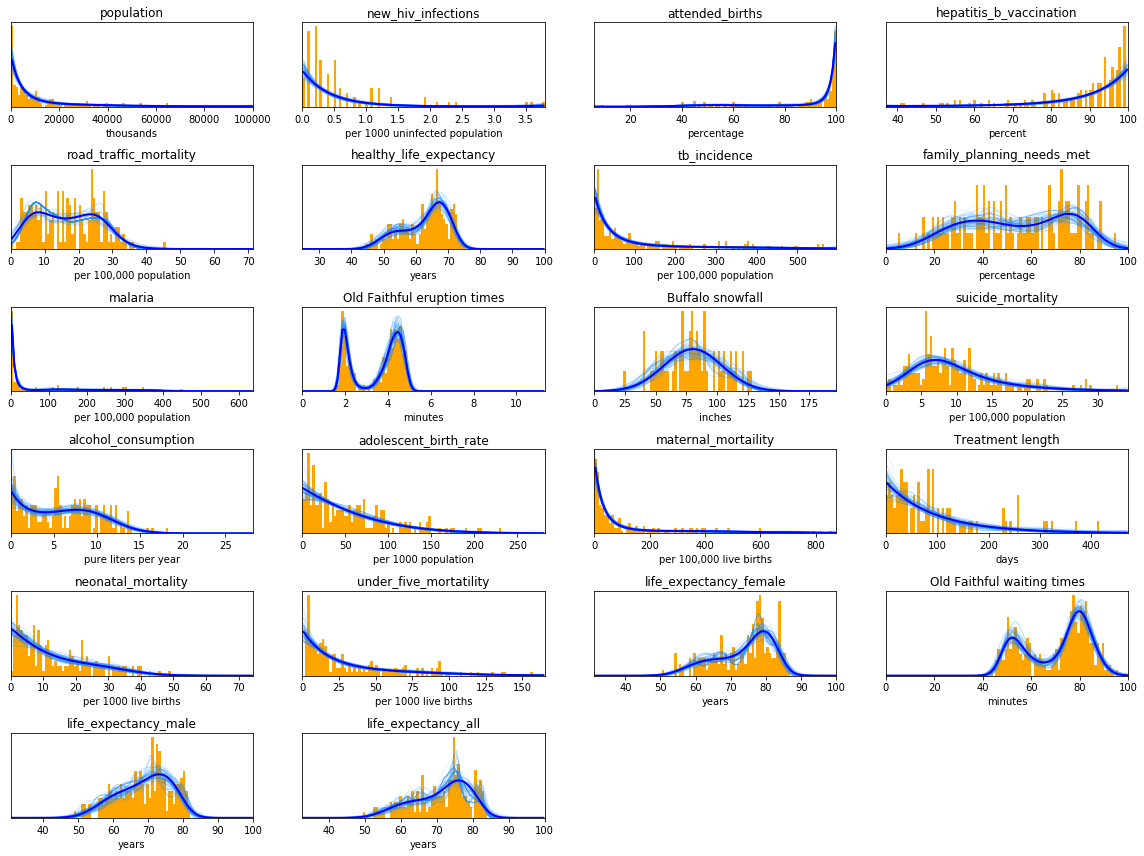

In [3]:
# Simulate data
#data = ft.simulate_data_1d(distribution_type='gaussian', N=10000)

num_rows = 6
num_cols = 4
v_in_per = 2
h_in_per = 4
fig, axs = plt.subplots(num_rows, num_cols,figsize=[h_in_per*num_cols, v_in_per*num_rows])
axs = axs.ravel()

# Default each axis to off
for ax in axs:
    ax.axis('off')

# Plot each dataset
for n, dataset in enumerate(ft.example_data_1d__datasets):

    # Use example data
    data, details = ft.example_data_1d(dataset, return_details=True)
    #bbox = details['bbox']
    #print(details)

    # Perform density estimation
    start = time.time()
    Q = ft.Deft1D(data)
    print('Deft1D computation took %f sec'%(time.time()-start))

    ax = axs[n]
    ax.axis('on')
    
    # Plot histogram
    ax.bar(Q.grid, Q.histogram, width=Q.grid_spacing, color='orange')

    # Plot Q_samples
    if Q.num_posterior_samples > 0:
        ax.plot(Q.grid, Q.sample_values, color='dodgerblue', linewidth=1, alpha = .1)

    # Plot Q_star
    ax.plot(Q.grid, Q.evaluate(Q.grid), color='b', linewidth=2)

    # Style plot
    ax.set_xlim(Q.bounding_box)
    ax.set_title(details['description'])
    ax.set_xlabel(details['units'])
    ax.set_yticks([])
    
plt.tight_layout()
plt.show()
fig.savefig('example_data.pdf')